In [4]:
from google.colab import files
uploaded = files.upload()

Saving Titanic-Dataset.csv to Titanic-Dataset.csv


In [5]:
import pandas as pd

data = pd.read_csv('Titanic-Dataset.csv')

data.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
data.shape

(891, 12)

In [9]:
data.isnull().sum()


,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [10]:
data.fillna(0, inplace=True)


In [11]:
data.rename(columns={'PassengerId':'id'}, inplace=True)


In [12]:
data['Name'].value_counts()

,count
Name,
"Dooley, Mr. Patrick",1
"Braund, Mr. Owen Harris",1
"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",1
"Heikkinen, Miss. Laina",1
"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1
...,...
"Hewlett, Mrs. (Mary D Kingcome)",1
"Vestrom, Miss. Hulda Amanda Adolfina",1
"Andersson, Mr. Anders Johan",1


In [17]:
data['Sex'].value_counts()
data['Pclass'].value_counts()
data['Embarked'].value_counts()


,count
Embarked,
S,644
C,168
Q,77
0,2


In [20]:
data.drop('Cabin', axis=1, inplace=True)


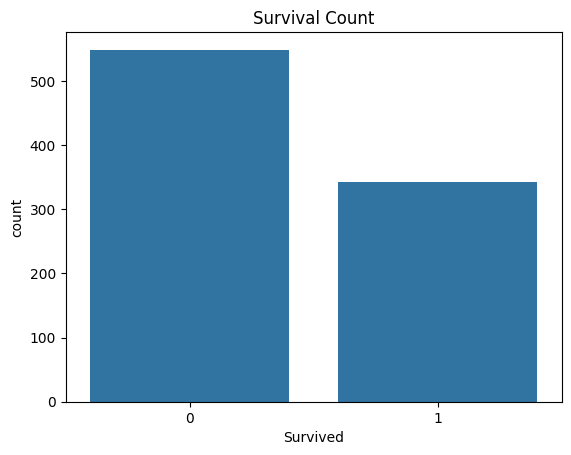

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(x='Survived', data=data)
plt.title("Survival Count")
plt.show()


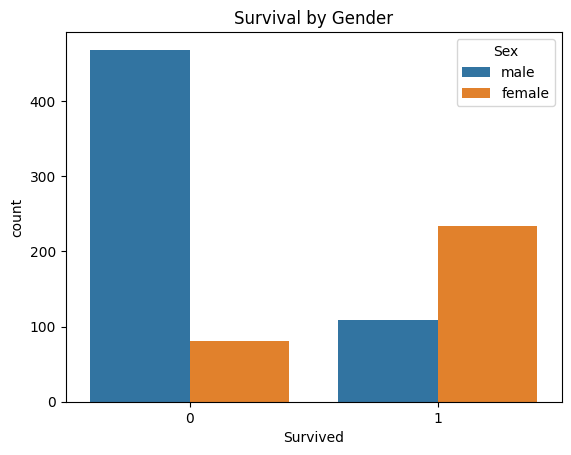

In [22]:
sns.countplot(x='Survived', hue='Sex', data=data)
plt.title("Survival by Gender")
plt.show()


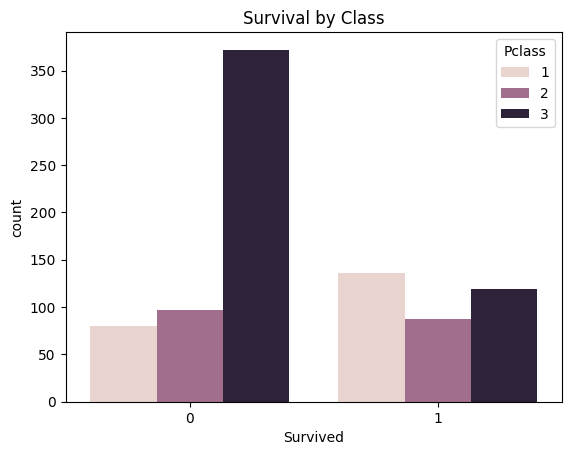

In [23]:
sns.countplot(x='Survived', hue='Pclass', data=data)
plt.title("Survival by Class")
plt.show()


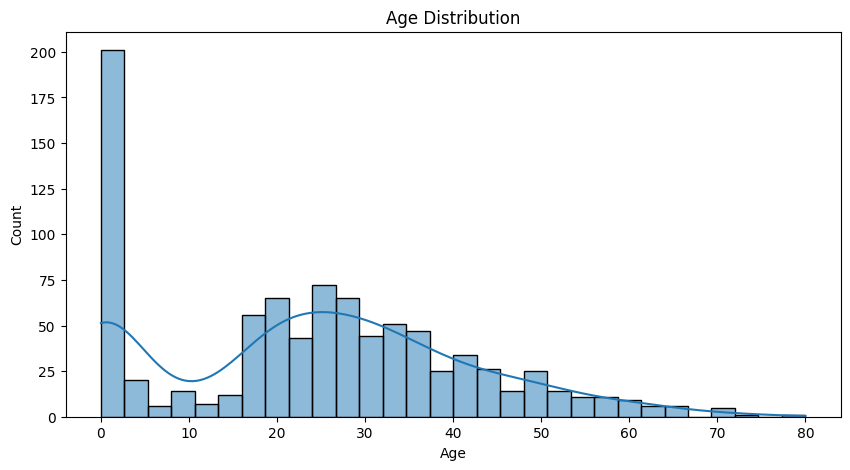

In [24]:
plt.figure(figsize=(10,5))
sns.histplot(data['Age'], bins=30, kde=True)
plt.title("Age Distribution")
plt.show()


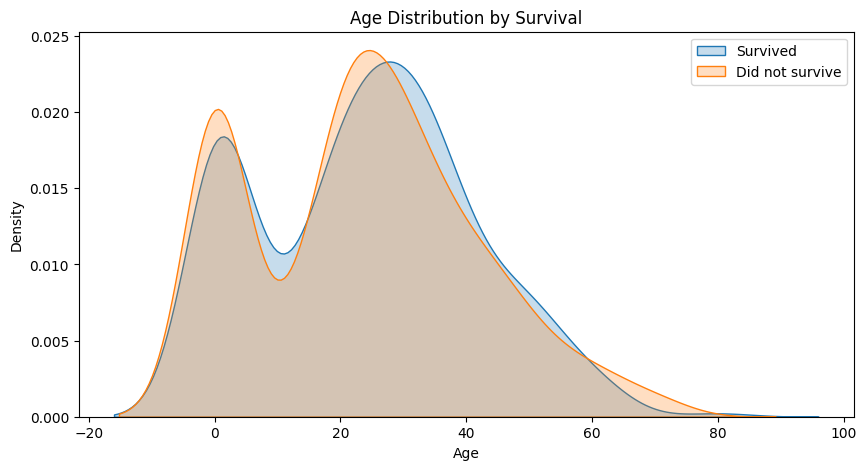

In [28]:

plt.figure(figsize=(10,5))
sns.kdeplot(data[data['Survived']==1]['Age'], label='Survived', fill=True)
sns.kdeplot(data[data['Survived']==0]['Age'], label='Did not survive', fill=True)
plt.title("Age Distribution by Survival")
plt.legend()
plt.show()


In [27]:
data.to_csv("titanic_cleaned.csv", index=False)